<a href="https://colab.research.google.com/github/njiutheguru/SVM/blob/main/svm_example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries...
Importing libaries as you go....*paye*

In [1]:
# Import libs
import pandas as pd
# importing data set
data = pd.read_csv('heart.csv')

In [2]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
7788 * 778

6059064

## Taking care of missing values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Taking Care of Duplicate values

In [6]:
data_dup = data.duplicated().any()

In [7]:
data_dup

True

In [8]:
data = data.drop_duplicates()

In [9]:
data_dup = data.duplicated().any()
data_dup

False

## Data Processing

In [10]:
cat_val = [] # categorical columns
cont_val = [] # continous columns ...multiple unique values

for column in data.columns:
  if data[column].nunique() <= 10:
    cat_val.append(column)
  else:
    cont_val.append(column)

In [11]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

 ## Encoding of Categorical Data

In [13]:
data['cp'].unique()

array([0, 1, 2, 3])

In [15]:
for d in cat_val:
  print(data[d].unique())

[1 0]
[0 1 2 3]
[0 1]
[1 0 2]
[0 1]
[2 0 1]
[2 0 1 3 4]
[3 2 1 0]
[0 1]


In [18]:
# removing dummy variable trap
# remove all the categories with 0 and 1


for d in cat_val:
  if data[d].unique().all() <= 2:
    cat_val.remove(d)

data = pd.get_dummies(data,columns=cat_val, drop_first=True)


KeyError: 'cp'

In [19]:
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,0,0,0,1,0,0,1,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,0,0,0,1,0,0,1,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,115,0,1.5,0,1,0,1,0,0,0,1,0,0,1,0
733,44,0,108,141,0,175,0,0.6,0,1,0,1,0,1,0,1,0,0,1,0
739,52,1,128,255,0,161,1,0.0,1,0,0,0,0,1,0,0,1,0,0,1
843,59,1,160,273,0,125,0,0.0,0,0,0,0,1,0,0,0,1,0,1,0


In [20]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,0,0,0,1,0,0,1,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,0,0,0,1,0,0,1,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,0,0,0,1,0,1,0,0,1,0


## Feature Scaling

In [21]:
# feature scaling allow us to put all our data in the same scale...
# Ml like knn, svm requires feature scaling since they are distance based machine learning models
# feature scaling is not needed in ml like randomforest algo.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [24]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0,0.806035,0,-0.037124,2,0,0,0,0,1,0,0,1,0,0,1
1,-0.157260,1,0.478910,-0.841918,1,0.237495,1,1.773958,0,0,0,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,0,-1.074521,1,1.342748,0,0,0,0,0,1,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0,0.499898,0,-0.899544,1,0,0,0,0,1,0,0,1,0,0,1
4,0.839089,0,0.364848,0.919336,1,-1.905464,0,0.739054,3,0,0,0,0,1,0,1,0,0,1,0


## Splitting the dataset into the training set and the test set

In [25]:
x = data.drop('target',axis=1)
y = data['target']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
x_test

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
233,-1.485726,0,-0.319525,1.151589,0,0.587366,0,-0.899544,0,1,0,0,1,0,0,1,0,1,0
101,0.285561,1,1.049221,-2.332210,1,1.024705,0,-0.727060,1,0,1,0,1,0,0,1,0,0,1
215,-0.600082,1,-0.091401,0.377412,0,0.937237,0,-0.382092,0,1,0,0,1,0,0,1,0,1,0
377,1.060500,0,-0.091401,1.093526,0,-1.205722,0,0.825296,2,0,0,0,1,0,1,0,0,1,0
131,-0.378671,0,-0.091401,0.183867,0,-0.024908,0,-0.468334,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1.281911,1,1.619532,-0.358057,0,-0.505981,0,1.084022,0,0,0,0,0,0,0,1,1,0,0
89,1.503322,1,0.707035,-1.035462,1,-0.374779,0,2.032684,2,0,0,0,1,0,1,0,0,0,1
391,-1.042904,1,-1.232023,0.338703,0,-0.768384,0,0.135360,0,0,0,1,1,0,1,0,0,0,1
331,0.949794,0,-1.346085,0.435475,0,0.849769,1,0.652812,2,0,0,0,1,0,1,0,0,1,0


In [29]:
y_test

233    1
101    1
215    1
377    1
131    1
      ..
274    1
89     0
391    0
331    0
363    1
Name: target, Length: 61, dtype: int64

## Logistic Regression

In [30]:
data.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred1 = log.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred1)

0.819672131147541

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,y_pred1)

array([[22,  4],
       [ 7, 28]])

# SVC

In [39]:
from sklearn import svm

In [40]:
sv = svm.SVC() # support vector classifier instantiated

In [41]:
# train the model
sv.fit(x_train, y_train)

SVC()

In [52]:
y_pred2 = sv.predict(x_test)

In [53]:
accuracy_score(y_test,y_pred2)

0.819672131147541

In [58]:
# retraining the model
sv = svm.SVC(kernel='linear')
sv.fit(x_train,y_train)


SVC(kernel='linear')

In [59]:
svm_pred = sv.predict(x_test)
accuracy_score(y_test,svm_pred)

0.8360655737704918

# KNeighbours Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred3 = knn.predict(x_test)

In [49]:
accuracy_score(y_test, y_pred3)

0.7704918032786885

In [71]:
score = []
for k in range(30,60): # must be less than 242
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  knn_pred = knn.predict(x_test)
  score.append(accuracy_score(y_test,knn_pred))


In [72]:
score

[0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541]

In [74]:
# returned best value = 42 # 42 is a magic number in ml..don't argue

In [75]:
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
accuracy_score(y_test,knn_pred)

0.8360655737704918

# Non Linear ML Algorithms

In [76]:
# import our data again

In [91]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [92]:
# removing duplicate vales
df = data.drop_duplicates()

In [93]:
df.shape

(302, 20)

In [94]:
x1 = data.drop('target',axis=1)
y1 = data['target']


In [95]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [96]:
x1_train.shape,y1_train.shape

((241, 19), (241,))

# Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dt = DecisionTreeClassifier()
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [99]:
dt_pred = dt.predict(x1_test)
accuracy_score(y1_test,dt_pred)

0.7377049180327869

# Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier


In [101]:
rf = RandomForestClassifier()

In [102]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [103]:
rf_pred = rf.predict(x1_test)

In [104]:
accuracy_score(y1_test,rf_pred)

0.8032786885245902

In [138]:
rf_score = []

max_val = [100]
for n in range(100, 1000, 20):
  rf = RandomForestClassifier(n_estimators=n, random_state=1)
  rf.fit(x1_train,y1_train)
  rf_p = rf.predict(x1_test)
  rf_score.append(accuracy_score(y1_test,rf_p))
  n_max = max(rf_score)
  n_max = 100 + rf_score.index(n_max) * 20

In [139]:
rf_score, n_max

([0.819672131147541,
  0.8032786885245902,
  0.819672131147541,
  0.8524590163934426,
  0.819672131147541,
  0.8524590163934426,
  0.819672131147541,
  0.819672131147541,
  0.819672131147541,
  0.8032786885245902,
  0.819672131147541,
  0.819672131147541,
  0.819672131147541,
  0.819672131147541,
  0.8032786885245902,
  0.819672131147541,
  0.819672131147541,
  0.8032786885245902,
  0.819672131147541,
  0.819672131147541,
  0.8360655737704918,
  0.8524590163934426,
  0.8360655737704918,
  0.819672131147541,
  0.8032786885245902,
  0.8032786885245902,
  0.819672131147541,
  0.8032786885245902,
  0.819672131147541,
  0.819672131147541,
  0.819672131147541,
  0.819672131147541,
  0.819672131147541,
  0.8360655737704918,
  0.819672131147541,
  0.8360655737704918,
  0.8360655737704918,
  0.819672131147541,
  0.819672131147541,
  0.8524590163934426,
  0.8360655737704918,
  0.8360655737704918,
  0.8360655737704918,
  0.819672131147541,
  0.8032786885245902],
 160)

In [140]:
rf_score[3]

0.8524590163934426

In [108]:
# while varying the n_estimators, 34*20 = 680 is the best values which

In [141]:
rf = RandomForestClassifier(n_estimators=160,random_state=1)
rf.fit(x1_train,y1_train)
rf_p = rf.predict(x1_test)
accuracy_score(y1_test,rf_p)

0.8524590163934426

# Gradient Boosting Classifier

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
gbc = GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)


GradientBoostingClassifier()

In [146]:
gbc_pred = gbc.predict(x1_test)
accuracy_score(y1_test,gbc_pred)

0.8032786885245902

In [149]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,svm_pred),
                                  accuracy_score(y_test,knn_pred),
                                  accuracy_score(y1_test,dt_pred),
                                  accuracy_score(y1_test,rf_p),
                                  accuracy_score(y1_test,gbc_pred)]})

In [154]:
final_data

,Models,ACC
0,LR,0.819672
1,SVM,0.836066
2,KNN,0.836066
3,DT,0.737705
4,RF,0.852459
5,GB,0.803279


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

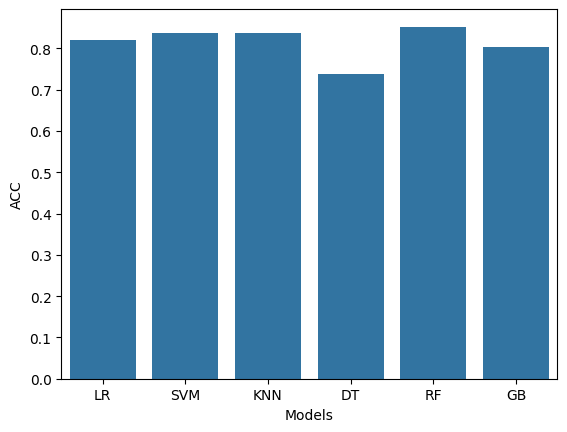

In [160]:
sns.barplot(x='Models',y='ACC', data=final_data)

# Save Model Using Joblib

In [161]:
import joblib


In [162]:
# saved random forest model
joblib.dump(rf,'saved_model_joblib')

['saved_model_joblib']

In [163]:
model = joblib.load("saved_model_joblib")

In [ ]:
# model.predict(new_data)
# deploy in a flask web app
# deploy in a GUI app